In [97]:
from dask import dataframe as dd

In [98]:
%%time
import datetime
import os
from tqdm import tqdm



Wall time: 0 ns


In [99]:


%%time
def time_exe():
    now = datetime.datetime.now()
    print (now.strftime("%Y-%m-%d %H:%M:%S"))

Wall time: 0 ns


In [100]:
time_exe()


2020-07-05 07:50:08


In [101]:
def chunk_filtering_yearwise_data(data_):
    return data_[(data_[5]>1994) & (data_[5] <2006)]

In [102]:


%%time
onemb ='googlebooks-eng-all-5gram-20120701-xq'


Wall time: 0 ns


In [103]:
dfd = dd.read_csv(onemb,
                    usecols=[0,1,2,3,4,5,6,7],
                            sep='\s+',
                            header=None, blocksize=64000000,error_bad_lines=False,
                            encoding='utf-8',engine='python')

In [107]:
dfd.head(5)

,0,1,2,3,4,5,6,7
0,XQuery_NOUN,",_.",XPath_X,",_.",and_CONJ,2002,7,3
1,XQuery_NOUN,",_.",XPath_X,",_.",and_CONJ,2004,5,4
2,XQuery_NOUN,",_.",XPath_X,",_.",and_CONJ,2005,1,1
3,XQuery_NOUN,",_.",XPath_X,",_.",and_CONJ,2006,18,10
4,XQuery_NOUN,",_.",XPath_X,",_.",and_CONJ,2007,15,12


In [111]:
print(dfd[6].sum())

dd.Scalar<series-..., dtype=int64>


In [9]:
#dfd[5].isna().sum().compute()

In [10]:
 dfd[5].value_counts().compute()

2005    30
2003    29
2006    28
2008    26
2007    26
2004    26
2002    26
2001    21
1999    14
2000    11
1996    10
1998     9
1995     8
1984     6
1991     6
1994     6
1997     6
1990     4
1989     4
1987     4
1985     4
1992     4
1982     4
1993     2
1979     2
1961     2
1962     2
1965     2
1976     2
1983     2
1980     2
1981     2
1986     2
1988     2
1957     2
Name: 5, dtype: int64

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
dfd95_2005 = dfd[(dfd[5]>1994) & (dfd[5]<2006)]

In [13]:
 year_count  = dfd95_2005[5].value_counts().compute()

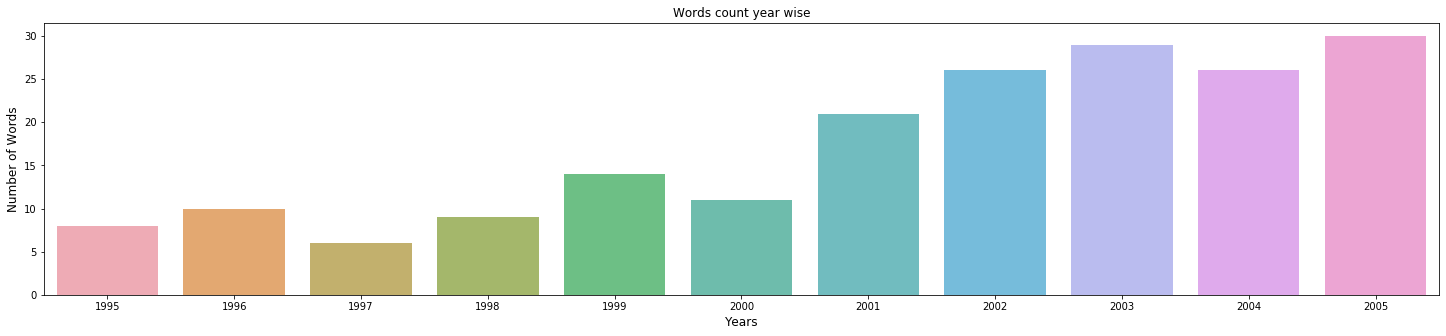

In [14]:

#city_count = city_count[:10,]
plt.figure(figsize=(25,5))
sns.barplot(year_count.index, year_count.values, alpha=0.8)
plt.title('Words count year wise')
plt.ylabel('Number of Words', fontsize=12)
plt.xlabel('Years', fontsize=12)
plt.show()

# String count 'The' for each  year

In [92]:
#df[df['ids'].str.contains("ball")]
dfs = pd.DataFrame([['HELLO', 'world'],['Help','Heep']], columns=['words','letters'])

In [93]:
dfs.head()

,words,letters
0,HELLO,world
1,Help,Heep


In [94]:
dfs.words.str.count("he|wo")

0    0
1    0
Name: words, dtype: int64

In [95]:
dfs['words'].str.contains('he', case=False).sum()

2

In [96]:
dfs.apply(lambda r: r.str.contains('he', case=False).any(), axis=1).sum()


2

In [ ]:
dfd95_2005

In [15]:
#df.drop([c for c in df.columns if df[c].isna().any().compute()], axis = 1)
#dfd[0]=dfd[0].str.lower()


In [16]:
#df.x.value_counts()
#dfd[5].value_counts().compute()

In [17]:
dfd.tail()


,0,1,2,3,4,5
331,XQuery,1.0,:,An,XML,2004
332,XQuery,1.0,:,An,XML,2005
333,XQuery,1.0,:,An,XML,2006
334,XQuery,1.0,:,An,XML,2007
335,XQuery,1.0,:,An,XML,2008


In [18]:
start = 1995
end = 2005
step = 1

In [19]:
import os

In [20]:
ls

 Volume in drive E is Daat
 Volume Serial Number is 00E8-39C4

 Directory of E:\download\proj\n5grm\small_ds

07/04/2020  12:49 PM    <DIR>          .
07/04/2020  12:49 PM    <DIR>          ..
07/04/2020  11:10 AM    <DIR>          .ipynb_checkpoints
07/02/2020  11:23 AM    <DIR>          dd1995_2005
07/02/2020  06:52 PM    <DIR>          googlebooks-eng-all-5gram-20120701-co_1995_2005_pyarrow
06/23/2020  11:17 AM            10,307 googlebooks-eng-all-5gram-20120701-gq
06/23/2020  11:20 AM     1,098,745,074 googlebooks-eng-all-5gram-20120701-gu
06/24/2020  03:31 PM         4,388,595 googlebooks-eng-all-5gram-20120701-np
06/24/2020  06:48 PM            13,833 googlebooks-eng-all-5gram-20120701-xq
07/04/2020  12:49 PM             4,838 n5grmYearWisePlot.ipynb
07/02/2020  11:08 PM             4,704 n5grmYearWiseSplit_dask.ipynb
07/03/2020  08:00 PM             1,887 n5grmYearWiseSplit_dask.py
07/04/2020  12:47 PM            62,850 n5grmYearWiseSplit_dask_working.ipynb
07/04/2020  12:10 PM

In [21]:
folderpath = 'yearwise'

# writnd 1995 to 2005 in single parque

year_dd.shape[0].compute()

In [22]:
 year_dd = dfd[ (dfd[5]>1994)&(dfd[5]<2006)]

In [23]:
path = os.path.join(folderpath,"1995_2005",onemb)
print(path)

yearwise\1995_2005\googlebooks-eng-all-5gram-20120701-xq


In [24]:
year_dd.to_parquet(path,engine='pyarrow')

# reading single parquet file

In [25]:
read_year_dd = dd.read_parquet(path, engine='pyarrow')

In [26]:
#convert dask data frame to pandas data frame
read_year_ddf = read_year_dd.compute()

# plot graph after eading data from parquet

In [27]:
read_year_ddf.head()

,0,1,2,3,4,5
index,,,,,,
0,XQuery_NOUN,",_.",XPath_X,",_.",and_CONJ,2002
1,XQuery_NOUN,",_.",XPath_X,",_.",and_CONJ,2004
2,XQuery_NOUN,",_.",XPath_X,",_.",and_CONJ,2005
6,Xq28_NOUN,in_ADP,males_NOUN,but_CONJ,not_ADV,1996
7,Xq28_NOUN,in_ADP,males_NOUN,but_CONJ,not_ADV,1997


for index, row in read_year_ddf.iterrows(): 
    print (row[0], row[5]) 

for i in range(len(read_year_ddf)) : 
  print(read_year_ddf.iloc[i, 0], read_year_ddf.iloc[i, 2])

In [28]:
read_year_ddf.iloc[:,5].value_counts()

2005    30
2003    29
2004    26
2002    26
2001    21
1999    14
2000    11
1996    10
1998     9
1995     8
1997     6
Name: 5, dtype: int64

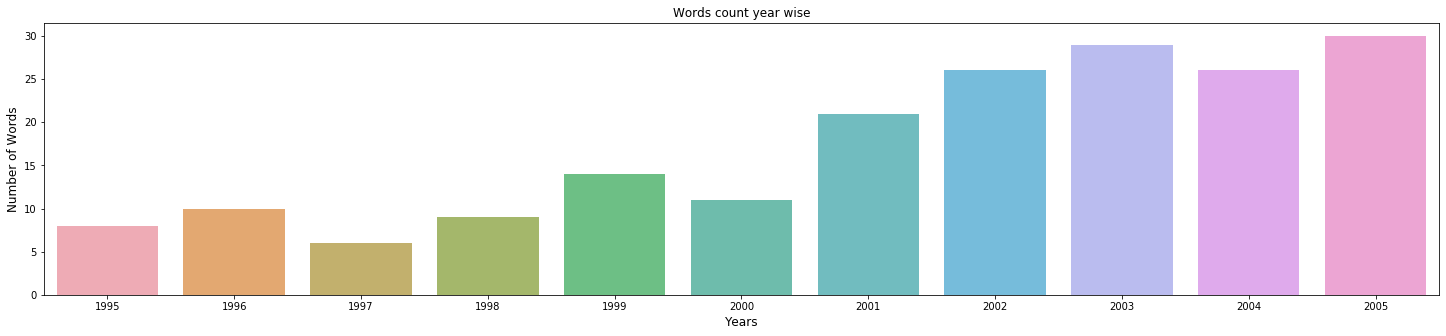

In [29]:
read_year_count = read_year_ddf.iloc[:,5].value_counts()
plt.figure(figsize=(25,5))
sns.barplot(read_year_count.index, read_year_count.values, alpha=0.8)
plt.title('Words count year wise')
plt.ylabel('Number of Words', fontsize=12)
plt.xlabel('Years', fontsize=12)
plt.show()

year_dd.to_parquet('googlebooks-eng-all-5gram-20120701-co_1995_2005_pyarrow',engine='pyarrow')

In [30]:
def split_data_year_wise(startyear,stopyear,yearsetp,basepath):
    print("start time")
    time_exe()
    stopyear= stopyear+1
    for i in range(startyear, stopyear, yearsetp):
        year_dd = dfd[dfd[5]==i]
        path = os.path.join(basepath,str(i),onemb)
        if not os.path.exists(path):
            os.makedirs(path)
        print("{}=>{}".format(i,path))
        year_dd.to_parquet(path,engine='pyarrow')
        #year_dd.to_csv(path)
        del year_dd
    print("finisheed time")
    time_exe()

def split_data_year_wise(startyear,stopyear,yearsetp,basepath):
    print('im in')
    print(startyear)
    print(stopyear)
    for i in range(startyear, stopyear, yearsetp):
        print(i)

In [31]:
split_data_year_wise(start,end,step,folderpath)

start time
2020-07-04 12:51:41
1995=>yearwise\1995\googlebooks-eng-all-5gram-20120701-xq
1996=>yearwise\1996\googlebooks-eng-all-5gram-20120701-xq
1997=>yearwise\1997\googlebooks-eng-all-5gram-20120701-xq
1998=>yearwise\1998\googlebooks-eng-all-5gram-20120701-xq
1999=>yearwise\1999\googlebooks-eng-all-5gram-20120701-xq
2000=>yearwise\2000\googlebooks-eng-all-5gram-20120701-xq
2001=>yearwise\2001\googlebooks-eng-all-5gram-20120701-xq
2002=>yearwise\2002\googlebooks-eng-all-5gram-20120701-xq
2003=>yearwise\2003\googlebooks-eng-all-5gram-20120701-xq
2004=>yearwise\2004\googlebooks-eng-all-5gram-20120701-xq
2005=>yearwise\2005\googlebooks-eng-all-5gram-20120701-xq
finisheed time
2020-07-04 12:51:42


In [32]:
year_dd.head()

,0,1,2,3,4,5
0,XQuery_NOUN,",_.",XPath_X,",_.",and_CONJ,2002
1,XQuery_NOUN,",_.",XPath_X,",_.",and_CONJ,2004
2,XQuery_NOUN,",_.",XPath_X,",_.",and_CONJ,2005
6,Xq28_NOUN,in_ADP,males_NOUN,but_CONJ,not_ADV,1996
7,Xq28_NOUN,in_ADP,males_NOUN,but_CONJ,not_ADV,1997


# REading parquet file

In [33]:
from os import listdir
from os.path import isfile, join

In [34]:
'google' in 'yearwise\1995\googlebooks-eng-all-5gram-20120701-xq' 

True

In [35]:
def fast_scandir(dirname):
    subfolders= [f.path for f in os.scandir(dirname) if f.is_dir()]
    for dirname in list(subfolders):
        subfolders.extend(fast_scandir(dirname))
    return subfolders

In [36]:
dirs = fast_scandir(folderpath)
g_dir = []
for f in dirs:
    if("google" in f):
        g_dir.append(f)


In [37]:
g_dir

['yearwise\\1995\\googlebooks-eng-all-5gram-20120701-xq',
 'yearwise\\1995_2005\\googlebooks-eng-all-5gram-20120701-xq',
 'yearwise\\1996\\googlebooks-eng-all-5gram-20120701-xq',
 'yearwise\\1997\\googlebooks-eng-all-5gram-20120701-xq',
 'yearwise\\1998\\googlebooks-eng-all-5gram-20120701-xq',
 'yearwise\\1999\\googlebooks-eng-all-5gram-20120701-xq',
 'yearwise\\2000\\googlebooks-eng-all-5gram-20120701-xq',
 'yearwise\\2001\\googlebooks-eng-all-5gram-20120701-xq',
 'yearwise\\2002\\googlebooks-eng-all-5gram-20120701-xq',
 'yearwise\\2003\\googlebooks-eng-all-5gram-20120701-xq',
 'yearwise\\2004\\googlebooks-eng-all-5gram-20120701-xq',
 'yearwise\\2005\\googlebooks-eng-all-5gram-20120701-xq']

In [62]:
read_dfd ={}
i = 0
for d  in g_dir:
    print(d)
    i = i+1
    read_dfd[i] = (d, dd.read_parquet(d, engine='pyarrow'))

yearwise\1995\googlebooks-eng-all-5gram-20120701-xq
yearwise\1995_2005\googlebooks-eng-all-5gram-20120701-xq
yearwise\1996\googlebooks-eng-all-5gram-20120701-xq
yearwise\1997\googlebooks-eng-all-5gram-20120701-xq
yearwise\1998\googlebooks-eng-all-5gram-20120701-xq
yearwise\1999\googlebooks-eng-all-5gram-20120701-xq
yearwise\2000\googlebooks-eng-all-5gram-20120701-xq
yearwise\2001\googlebooks-eng-all-5gram-20120701-xq
yearwise\2002\googlebooks-eng-all-5gram-20120701-xq
yearwise\2003\googlebooks-eng-all-5gram-20120701-xq
yearwise\2004\googlebooks-eng-all-5gram-20120701-xq
yearwise\2005\googlebooks-eng-all-5gram-20120701-xq


In [65]:
df1 = {}
i = 0
for k,v in read_dfd.items():
    i = i+1
    df1[i] = (v[0], v[1].compute())

In [67]:
for k,v in df1.items():
    print(v[0])
    print(v[1].iloc[:,5].value_counts())

yearwise\1995\googlebooks-eng-all-5gram-20120701-xq
1995    336819
Name: 5, dtype: int64
yearwise\1995_2005\googlebooks-eng-all-5gram-20120701-xq
2005    30
2003    29
2004    26
2002    26
2001    21
1999    14
2000    11
1996    10
1998     9
1995     8
1997     6
Name: 5, dtype: int64
yearwise\1996\googlebooks-eng-all-5gram-20120701-xq
1996    3635
Name: 5, dtype: int64
yearwise\1997\googlebooks-eng-all-5gram-20120701-xq
1997    6
Name: 5, dtype: int64
yearwise\1998\googlebooks-eng-all-5gram-20120701-xq
1998    9
Name: 5, dtype: int64
yearwise\1999\googlebooks-eng-all-5gram-20120701-xq
1999    14
Name: 5, dtype: int64
yearwise\2000\googlebooks-eng-all-5gram-20120701-xq
2000    11
Name: 5, dtype: int64
yearwise\2001\googlebooks-eng-all-5gram-20120701-xq
2001    21
Name: 5, dtype: int64
yearwise\2002\googlebooks-eng-all-5gram-20120701-xq
2002    26
Name: 5, dtype: int64
yearwise\2003\googlebooks-eng-all-5gram-20120701-xq
2003    29
Name: 5, dtype: int64
yearwise\2004\googlebooks-eng-a

In [70]:
df1.get(1)

('yearwise\\1995\\googlebooks-eng-all-5gram-20120701-xq',
                 0            1          2             3        4     5
 index                                                                 
 19             XQ            ,         et            al        .  1995
 53        XQ_NOUN          ,_.       et_X          al_X      ._.  1995
 158          Xq27      fragile       site             .    _END_  1995
 181     Xq27_NOUN  fragile_ADJ  site_NOUN           ._.    _END_  1995
 233            Xq           is        the    wavelength       of  1995
 ...           ...          ...        ...           ...      ...   ...
 239658       guys           in        the          same     room  1995
 239728       guys         want         to            go     back  1995
 239765  guys_NOUN          ,_.        "_.       one_NUM   of_ADP  1995
 239793  guys_NOUN     are_VERB    not_ADV  allowed_VERB   to_PRT  1995
 239813  guys_NOUN      do_VERB    not_ADV     know_VERB  me_PRON  1995
 
 [33

In [41]:
import pandas as pd

In [42]:
df1= read_dfd.compute()

In [43]:
df1.head()

,0,1,2,3,4,5
index,,,,,,
19,XQ,",",et,al,.,1995
53,XQ_NOUN,",_.",et_X,al_X,._.,1995
158,Xq27,fragile,site,.,_END_,1995
181,Xq27_NOUN,fragile_ADJ,site_NOUN,._.,_END_,1995
233,Xq,is,the,wavelength,of,1995


 year_dd = dd[dd[5]==1996]

year_dd.head()

dd.tail()

In [112]:
#!jupyter nbconvert --to script n5grmYearWiseSplit_dask_working.ipynb

In [115]:
for i in range (1995,2006):
    print(i)
    

1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005


dd.shape[0].compute()

top_links_grouped_dask = dfd.loc[
    dfd[‘referrer_type’].isin([‘link’]), 
    [‘coming_from’,’article’, ‘n’]]\
        .groupby([‘coming_from’, ‘article’])

#d1 = dd.loc[dd['0']].groupby(['5'])
dd.groupby([5])[6].count().compute()